In [1]:
# Library Imports 

import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

% matplotlib inline

In [2]:
business = pd.read_json('./Data/business.json', lines =  True)
#business = pd.read_pickle('business.pkl')

print(business.shape)


# Only open businesses & with categories
business = business[business.is_open == 1]
business.drop(columns = ['address','is_open', 'latitude', 'longitude'], inplace = True)
business = business[business.categories.apply(len) != 0]

business.head()

(174567, 15)


,attributes,business_id,categories,city,hours,name,neighborhood,postal_code,review_count,stars,state
0,"{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",Dental by Design,,85044,22,4.0,AZ
1,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",Stephen Szabo Salon,,15317,11,3.0,PA
2,{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},Western Motor Vehicle,,85017,18,1.5,AZ
4,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",Brick House Tavern + Tap,,44221,116,3.5,OH
5,"{'GoodForMeal': {'dessert': False, 'latenight'...",o9eMRCWt5PkpLDE0gOPtcQ,"[Italian, Restaurants]",Stuttgart,"{'Monday': '18:00-0:00', 'Tuesday': '18:00-0:0...",Messina,,70567,5,4.0,BW


In [3]:
business.columns, business.shape

(Index(['attributes', 'business_id', 'categories', 'city', 'hours', 'name',
        'neighborhood', 'postal_code', 'review_count', 'stars', 'state'],
       dtype='object'), (146226, 11))

In [4]:
# Takes a lot of time to read
review = pd.DataFrame()

df = pd.read_json('./Data/review.json',lines = True, chunksize= 1e5)

try:
   for df_chunk in df:
       review = pd.concat([review, df_chunk])
except ValueError:
       print ('\nSome messages in the file cannot be parsed')

review.drop(columns = ['cool','funny'], inplace = True)

print(review.shape)

review.head()

(5261669, 7)


,business_id,date,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,2016-05-28,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,2016-05-28,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,2016-05-28,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,2016-05-28,MV3CcKScW05u5LVfF6ok0g,5,Lester's is located in a beautiful neighborhoo...,0,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,2016-05-28,IXvOzsEMYtiJI0CARmj77Q,4,Love coming here. Yes the place always needs t...,0,bv2nCi5Qv5vroFiqKGopiw


In [5]:
review.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'useful',
       'user_id'],
      dtype='object')

In [6]:
review.describe()

,stars,useful
count,5.261669e+06,5.261669e+06
mean,3.727740e+00,1.385085e+00
std,1.433593e+00,4.528727e+00
min,1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00
75%,5.000000e+00,2.000000e+00
max,5.000000e+00,3.364000e+03


In [7]:
checkin = pd.read_json('./Data/checkin.json', lines = True)
#checkin = pd.read_pickle('checkin.pkl')
print(checkin.shape)
checkin.head()

(146350, 2)


,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'21:00': 4, '1:00': 1, '4:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Monday': {'13:00': 1}, 'Thursday': {'20:00':..."
2,tJRDll5yqpZwehenzE2cSg,"{'Monday': {'12:00': 1, '1:00': 1}, 'Friday': ..."
3,r1p7RAMzCV_6NPF0dNoR3g,"{'Thursday': {'23:00': 1}, 'Saturday': {'21:00..."
4,mDdqgfrvROGAumcQdZ3HIg,"{'Monday': {'12:00': 1, '21:00': 1}, 'Wednesda..."


In [8]:
user = pd.read_json('./Data/user.json', lines = True)
#user = pd.read_pickle('user.pkl')

user_columns_to_remove = ['compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer',
       'cool', 'elite', 'fans', 'friends', 'funny',
       'useful', 'yelping_since']
user.drop(columns = user_columns_to_remove, inplace = True)

print(user.shape)
user.head()

(1326101, 4)


,average_stars,name,review_count,user_id
0,4.67,Johnny,8,oMy_rEb0UBEmMlu-zcxnoQ
1,3.70,Chris,10,JJ-aSuM4pCFPdkfoZ34q0Q
2,2.00,Tiffy,1,uUzsFQn_6cXDh6rPNGbIFA
3,4.67,Mark,6,mBneaEEH5EMyxaVyqS-72A
4,4.67,Evelyn,3,W5mJGs-dcDWRGEhAzUYtoA


In [9]:
user.columns


Index(['average_stars', 'name', 'review_count', 'user_id'], dtype='object')

# Using only half the data

In [10]:
# train_test_split
business, _ = train_test_split(business, test_size = 0.5)
review, _ = train_test_split(review, test_size = 0.5)
user, _ = train_test_split(user, test_size = 0.5)

In [11]:
# Exploratory Data Analysis

## Distribution of Reviews

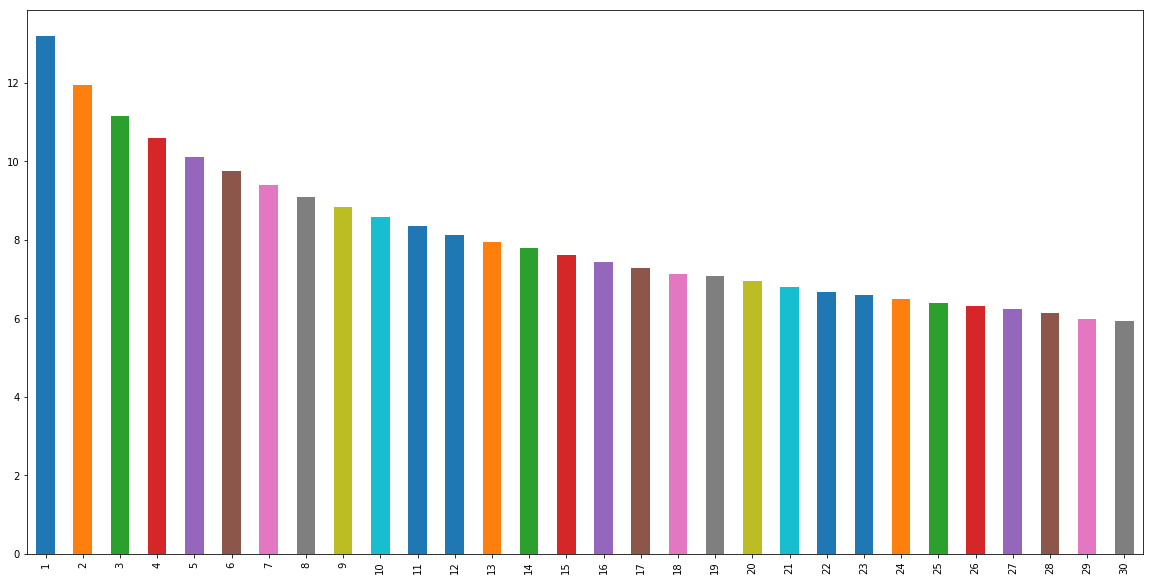

In [12]:
dist_reviews = review.user_id.value_counts().value_counts()
np.log(dist_reviews[ :30]).plot(kind = 'bar', figsize = (20,10))

## Person with the most reviews

In [13]:
max_rev_user_id = user.user_id[user.review_count == max(user.review_count)].values[0]
print('Name : %s' % (user.name[user.user_id == max_rev_user_id].values[0]))
print('Number of Reviews : %s' % (user.review_count[user.user_id == max_rev_user_id].values[0]))

person_most_reviews = review[review.user_id == max_rev_user_id]
print('First Review : %s' % min(person_most_reviews.date))
print('Latest Review : %s' % max(person_most_reviews.date))

Name : Victor
Number of Reviews : 11954
First Review : 2008-03-01 00:00:00
Latest Review : 2008-03-01 00:00:00


In [14]:
person_most_reviews

,business_id,date,review_id,stars,text,useful,user_id
5214599,u_vPjx925UPEG9DFOAAvFQ,2008-03-01,hsKnV3BM6se0VcnFM7RIMw,2,was this one of many casinos that didn't offer...,1,8k3aO-mPeyhbR5HUucA5aA
5214597,z7GAft_JrFNmAH5xbVeYSA,2008-03-01,lobDkv7bYpJXuG_ZBKPOUg,3,it was pretty cheap to fly to las vegas. depen...,3,8k3aO-mPeyhbR5HUucA5aA


## Ratings

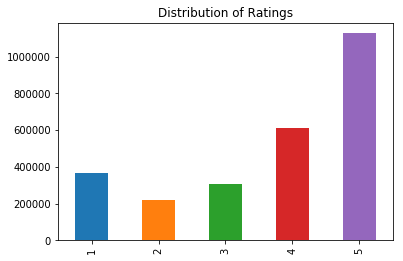

In [15]:
review.stars.value_counts().sort_index().plot(kind = 'bar', title = 'Distribution of Ratings')

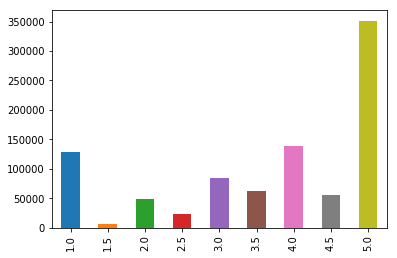

In [16]:
avg_rating_user = pd.Series(np.round(review[['stars', 'user_id']].groupby('user_id').mean().stars.values * 2) / 2)
avg_rating_user.value_counts().sort_index().plot(kind = 'bar')

## Most Common Business Categories

Plot


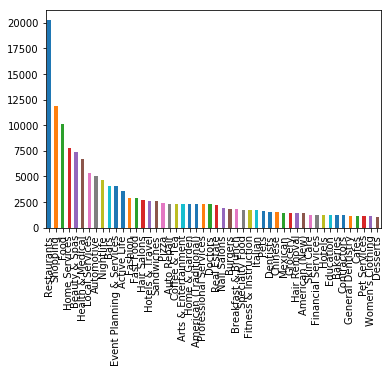

In [17]:
print('Plot')
all_business_categories = [item for sublist in business.categories for item in sublist]
pd.Series(all_business_categories).value_counts()[:50].plot(kind = 'bar')

## Most Reviewed Business Categories

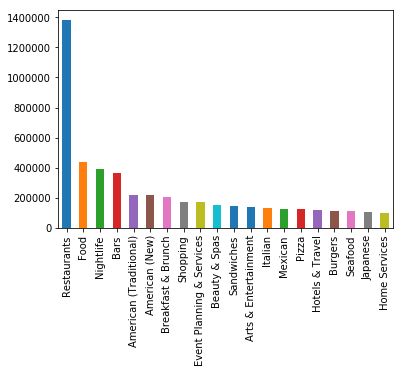

In [18]:
x = pd.get_dummies(business.categories.apply(pd.Series).stack()).sum(level = 0)
most_reviewed_places = x.apply(lambda x: np.asarray(x) * np.asarray(business.review_count[business.categories.apply(len) != 0]))
most_reviewed_places.sum().sort_values(ascending = False)[:20].plot(kind = 'bar')

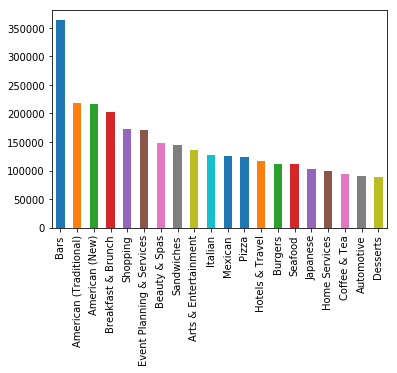

In [19]:
most_reviewed_places = x.drop(columns = ['Restaurants', 'Food', 'Nightlife']).apply(lambda x: np.asarray(x) * np.asarray(business.review_count[business.categories.apply(len) != 0]))
most_reviewed_places.sum().sort_values(ascending = False)[:20].plot(kind = 'bar')


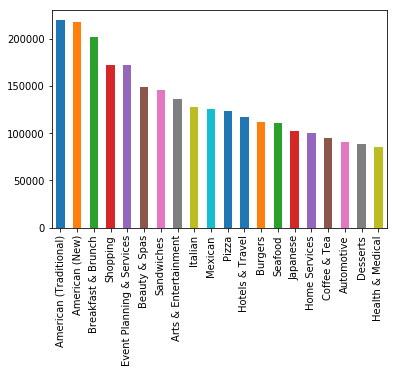

In [20]:
most_reviewed_places = x.drop(columns = ['Restaurants', 'Food', 'Nightlife', 'Bars']).apply(lambda x: np.asarray(x) * np.asarray(business.review_count[business.categories.apply(len) != 0]))
most_reviewed_places.sum().sort_values(ascending = False)[:20].plot(kind = 'bar')


# Food Trends

In [21]:
# Dropping non restaurants businesses
bus_cat_filter = business.categories.apply(lambda x: False if 'Restaurants' in x else True)
business.drop(business[bus_cat_filter].index, inplace = True)

In [22]:
# Dropping reviews of non restaurants and non-food business
rew_busniess_filter = review.business_id.isin(list(business.business_id))
review = review[rew_busniess_filter]

In [26]:
y = pd.get_dummies(business.categories.apply(pd.Series).stack()).sum(level = 0)
y = y.replace(0, np.NaN)
ydf = pd.DataFrame(y.multiply(business['stars'], axis = 0).mean())
y_fil_index = y.multiply(business['stars'], axis = 0).count()[y.multiply(business['stars'], axis = 0).count() > 5].index

In [27]:
# business[business.categories.apply(lambda x: True if 'Personal Assistants' in x else False)]['categories'].values

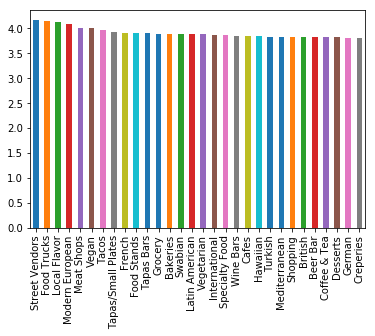

In [28]:
y_fil_index = y.multiply(business['stars'], axis = 0).count()[y.multiply(business['stars'], axis = 0).count() > 50].index
ydf.loc[y_fil_index, 0].sort_values(ascending = False)[ :30].plot(kind = 'bar')

In [32]:
from RAKE import rake
rake = rake.Rake("RAKE/SmartStoplist.txt")

In [47]:
five_star_reviews = review[review["stars"] == 5]
keywords_list = []
for row_index, row in five_star_reviews.iterrows():
    keywords_list.append(rake.run(row.text))

keywords_list[:10]

KeyboardInterrupt: 

# FEATURE ENGINEERING

In [49]:
# Avg restaurant rating
avg_restaurant_rating = review.groupby('business_id').mean()[['stars']]
avg_restaurant_rating.columns = ['avg_rating']
business = pd.merge(business, avg_restaurant_rating, how='inner', on=None, 
                     left_on='business_id', right_on=None,
                     left_index=False, right_index=True, sort=True,
                     suffixes=('_x', '_y'), copy=True, indicator=False,
                     validate=None)

In [50]:
print(business.columns, business.shape)
print(review.columns, review.shape)

Index(['attributes', 'business_id', 'categories', 'city', 'hours', 'name',
       'neighborhood', 'postal_code', 'review_count', 'stars', 'state',
       'avg_rating'],
      dtype='object') (19933, 12)
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'useful',
       'user_id'],
      dtype='object') (689751, 7)


In [51]:
business_categories_df = pd.get_dummies(business.categories.apply(pd.Series).stack()).sum(level=0)
business_categories_counts = business_categories_df.sum().sort_values(ascending = False)

business_categories_drop = list(business_categories_counts[business_categories_counts < 10].index.values)
business_categories_drop.append('Restaurants')
business_categories_drop.append('Food')
business_categories_df.drop(columns = business_categories_drop, inplace = True)

business.drop(columns = ['categories'], inplace = True)
business = pd.concat([business, business_categories_df], axis=1)

business = business[business[business_categories_df.columns].sum(axis = 1) != 0]
print(business.columns, business.shape)

Index(['attributes', 'business_id', 'city', 'hours', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state',
       ...
       'Vegetarian', 'Venues & Event Spaces', 'Vietnamese', 'Waffles',
       'Wedding Planning', 'Whiskey Bars', 'Wine & Spirits', 'Wine Bars',
       'Wineries', 'Wraps'],
      dtype='object', length=225) (19804, 225)


In [52]:
review.columns = ['business_id', 'date', 'review_id', 'review_stars', 'text', 'useful','user_id']

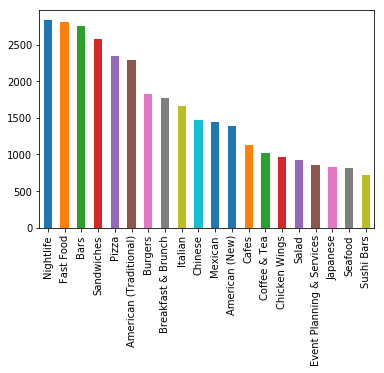

In [53]:
business_categories_df.sum().sort_values(ascending = False)[:20].plot(kind = 'bar')

In [54]:
alldf = pd.merge(business, review, how='inner', on=None, 
                     left_on='business_id', right_on='business_id',
                     left_index=False, right_index=False, sort=True,
                     suffixes=('_business', '_review'), copy=True, indicator=False,
                     validate=None)
alldf = pd.merge(alldf, user, how='inner', on=None, 
                     left_on='user_id', right_on='user_id',
                     left_index=False, right_index=False, sort=True,
                     suffixes=('', '_user'), copy=True, indicator=False,
                     validate=None)

In [55]:
for i in alldf.columns:
    print(i)

attributes
business_id
city
hours
name
neighborhood
postal_code
review_count
stars
state
avg_rating
Acai Bowls
Active Life
Afghan
African
American (New)
American (Traditional)
Arabian
Arcades
Argentine
Art Galleries
Arts & Crafts
Arts & Entertainment
Asian Fusion
Automotive
Bagels
Bakeries
Barbeque
Bars
Beauty & Spas
Bed & Breakfast
Beer
Beer Bar
Beer Garden
Beer Gardens
Belgian
Bistros
Books
Bowling
Brasseries
Brazilian
Breakfast & Brunch
Breweries
British
Bubble Tea
Buffets
Burgers
Butcher
Cafes
Cafeteria
Cajun/Creole
Cambodian
Canadian (New)
Candy Stores
Cantonese
Caribbean
Casinos
Caterers
Cheese Shops
Cheesesteaks
Chicken Shop
Chicken Wings
Chinese
Chocolatiers & Shops
Cocktail Bars
Coffee & Tea
Coffee Roasteries
Colombian
Comfort Food
Convenience Stores
Creperies
Cuban
Dance Clubs
Day Spas
Delicatessen
Delis
Desserts
Dim Sum
Diners
Dive Bars
Do-It-Yourself Food
Donuts
Education
Ethiopian
Ethnic Food
Event Planning & Services
Falafel
Farmers Market
Fashion
Fast Food
Festivals
Fili

In [56]:
business.head()

,attributes,business_id,city,hours,name,neighborhood,postal_code,review_count,stars,state,...,Vegetarian,Venues & Event Spaces,Vietnamese,Waffles,Wedding Planning,Whiskey Bars,Wine & Spirits,Wine Bars,Wineries,Wraps
50934,"{'RestaurantsTableService': True, 'GoodForMeal...",--6MefnULPED_I942VcFNA,Richmond Hill,"{'Monday': '11:00-22:30', 'Tuesday': '11:00-22...",John's Chinese BBQ Restaurant,,L4B 3P7,37,3.0,ON,...,0,0,0,0,0,0,0,0,0,0
8253,"{'RestaurantsTableService': True, 'GoodForMeal...",--DaPTJW3-tB1vP-PfdTEg,Toronto,"{'Monday': '7:00-15:00', 'Tuesday': '7:00-15:0...",Sunnyside Grill,Corso Italia,M6E,39,3.5,ON,...,0,0,0,0,0,0,0,0,0,0
104227,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",--FBCX-N37CMYDfs790Bnw,Henderson,{},The Bar At Bermuda & St. Rose,Anthem,89052,108,3.5,NV,...,0,0,0,0,0,0,1,0,0,0
168847,"{'RestaurantsTableService': False, 'GoodForMea...",--GM_ORV2cYS-h38DSaCLw,Canonsburg,"{'Monday': '11:00-23:00', 'Tuesday': '11:00-23...",Mm Mm Pizza,,15317,7,4.0,PA,...,0,0,0,0,0,0,0,0,0,0
9131,"{'RestaurantsTableService': False, 'GoodForMea...",--KCl2FvVQpvjzmZSPyviA,Charlotte,"{'Monday': '10:30-0:00', 'Tuesday': '10:30-0:0...",Hungry Howie's Pizza,,28269,12,3.0,NC,...,0,0,0,0,0,0,0,0,0,0


In [57]:
user_idx = 'gFAdHnUksK22NDhvqkLunA'
 
def userCategoriesRatings(user_id, cols = business_categories_df.columns):
    person_filter = alldf.user_id == user_id
    df = alldf[person_filter]
    df = df.replace(0, np.NaN)

    #top_cat = df[cols].apply(lambda x: np.asarray(x) * np.asarray(df.review_stars.values)).mean()
    top_cat = df[cols].multiply(df.review_stars, axis = 0).mean()

    return top_cat[~(top_cat.isnull())]
    
userCategoriesRatings(user_idx)

Series([], dtype: float64)

In [58]:
def userVisited(user_id, inverse = 0):
    if inverse == 0:
        res = review.business_id[review.user_id == user_id].unique()
    else:
        res = review.business_id[~(review.user_id == user_id)].unique()
    return res

# Most Popular Recommendations

In [59]:
def mostPopular(user_id, city, limit = 10):
    top_picks = business[business.city == city]
    
    print('Total available options in the location : %d' % (top_picks.shape[0]))
    
    places_visited = review.business_id[review.user_id == user_id]
    
    top_picks = top_picks[~top_picks.business_id.isin(places_visited)]
    top_picks = top_picks.sort_values('avg_rating', ascending = False)
    
    return top_picks['name'][:limit].values

In [60]:
mostPopular('JJ-aSuM4pCFPdkfoZ34q0Q', 'Toronto')

Total available options in the location : 2479


array(['The Korner Pub', 'Pasta Pantry', 'Ontario Fresh & Tasty',
       'Paint Cabin', 'Village Vinyl', 'Egg Sunrise Grill', 'Foodbenders',
       'Bar Sybanne', 'Trinity Square Cafe', 'Popeyes Louisiana Kitchen'], dtype=object)

In [61]:
list_col = list(business_categories_df.columns.values)
list_col.append('user_id')
user_cat_matrix = alldf.loc[:, list_col].groupby('user_id').sum()

In [65]:
user_cat_matrix.head()

,Acai Bowls,Active Life,Afghan,African,American (New),American (Traditional),Arabian,Arcades,Argentine,Art Galleries,...,Vegetarian,Venues & Event Spaces,Vietnamese,Waffles,Wedding Planning,Whiskey Bars,Wine & Spirits,Wine Bars,Wineries,Wraps
user_id,,,,,,,,,,,,,,,,,,,,,
---1lKK3aKOuomHnwAkAow,0,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
--2HUmLkcNHZp0xw6AMBPg,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--2vR0DIsmQ6WfcSzKWigw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--3l8wysfp49Z2TLnyT0vg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
--A4pFATzQJx9n4l1IAC3A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# User-User Collaborative filtering:

In [62]:
# User-User Collaborative filtering:

def findSimilarRestaurants(user_id, user_cat_matrix = user_cat_matrix, n = 10):
    
    person = np.array(user_cat_matrix.loc[user_id,])[:, np.newaxis]
    others = np.array(user_cat_matrix[user_cat_matrix.index != user_idx])
    scores = np.sum((others * person.T), axis = 1)/ (np.sum(person*2) * np.sum(others*2, axis = 1))
    
    sim_user_id = user_cat_matrix.index.values[np.argsort(-scores)[:n]]
    
    sim_visited = []
    for i in sim_user_id:
        sim_visited.extend(userVisited(i))
        
    sim_visited = pd.DataFrame(pd.Series(sim_visited).value_counts(), columns = ['Counts'])
    bus_col = ['stars', 'business_id', 'name']
    bus_col.extend(userCategoriesRatings(user_idx).index.values)
    
    suggestions = pd.merge(sim_visited, business[bus_col], how='inner', on=None, 
                     left_on=None, right_on='business_id',
                     left_index=True, right_index=False, sort=True,
                     suffixes=('_business', '_review'), copy=True, indicator=False,
                     validate=None)
    
    suggestions = suggestions[~suggestions.business_id.isin(userVisited(user_idx))]
    suggestions['user_fav_cuisine'] = suggestions[userCategoriesRatings(user_idx).index.values].sum(axis = 1)

    return suggestions.sort_values(by = ['Counts','stars', 'user_fav_cuisine'], ascending = False)

In [66]:
user_idx = '---1lKK3aKOuomHnwAkAow'
similar_restaurants = findSimilarRestaurants(user_idx, user_cat_matrix)

In [92]:
def get_business_keywords(business_id):
    df = review.loc[(review['business_id'] == business_id) & (review['review_stars'] == 5)]
    keywords_list = []
    for idx, r in df.iterrows():
        keywords_list.extend(rake.run(r.text))
    sorted_keywords = sorted(keywords_list, key=lambda tup: tup[1], reverse=True)
    
    return sorted_keywords


In [94]:
similar_restaurants["keywords"] = similar_restaurants.business_id.apply(get_business_keywords)

In [99]:
similar_restaurants["keywords"][117153]

[('tesla era long filament bulb decor combined', 44.5),
 ('grilled shrimp & ld kill cheddar grits', 33.5),
 ('grilles salad scallops grouper meat', 25.0),
 ('speakeasy atmosphere serving phenomenal cocktails', 25.0),
 ('truffle mac & cheese & fried oysters', 25.0),
 ('wednesday night pepperoni pizza special', 25.0),
 ('corn flake crusted french toast', 25.0),
 ('house made beer mustard', 16.0),
 ('hand crafted specialty drinks', 16.0),
 ('house made waffle cones', 16.0),
 ('black grouper entree looked', 16.0),
 ('feta cheese salad tossed', 16.0),
 ('handcrafted smoked whiskey sour', 16.0),
 ('chat- grilled style oysters', 16.0),
 ('indulgent layered chocolate tort', 16.0),
 ('succulent butter basted scallops', 16.0),
 ('awesome low key vibe', 16.0),
 ('cool speakeasy style place', 16.0),
 ('full fatty goodness making', 16.0),
 ('play rat pack music', 16.0),
 ('tapas small plate meals', 16.0),
 ('ice earthy brown sugar', 15.0),
 ('smoky tequila & sweet berries', 15.0),
 ('hand picked fl

In [89]:
import nltk
from nltk.corpus import wordnet as wn
food = wn.synset('food.n.01')
# food.hyponyms()
for lemma in food.lemmas():
    print(lemma.name())

food
nutrient


In [48]:
review.head()

,business_id,date,review_id,stars,text,useful,user_id
4938457,pH0BLkL4cbxKzu471VZnuA,2011-10-15,8LEpg0jn9n4EekDskhbpTg,5,I went TWICE on my trip to Vegas. That's how g...,1,ok0rQwre9vVmlhHSshM7Mg
2418881,rntKF4Dm9JIJoSNi5XqRsQ,2013-02-09,Vz7JZ1w9dO5kSOHMJhMS4A,4,My business travel in Toronto became more orie...,2,-G7Zkl1wIWBBmD0KRy_sCw
488089,s0vNtuLs1cwEqHTXKiS05w,2015-04-03,qLCkFa29r9fjqiHkUpu4kA,1,I was bummed out about this place. Service wa...,0,J6kO-kcNHTke2d0pf9YCiw
4704258,hUCujBvgttk5jNh_uQwi2Q,2016-04-05,RKmGP1fqkI-goOmTDHTz5A,4,Really really good pizza. Very similar to othe...,0,0Ikc6654Wab41Nq8ytuNBw
1244779,ebgu1HjoE5S45U7oKyq4sw,2014-02-15,jjLjB0ocIA-JCVUzgYW9OQ,2,This is probably the last time I eat at Tick T...,9,hy4uEHgITEfzxrXzyDhCRg


# Baseline Prediction

http://cs229.stanford.edu/proj2013/SawantPai-YelpFoodRecommendationSystem.pdf

In [62]:
mu = np.mean(review.review_stars)
mean_user_ratings = review[['user_id', 'review_stars']].groupby('user_id').mean()
mean_business_ratings = review[['business_id', 'review_stars']].groupby('business_id').mean()


In [88]:
def baseline_rating(user_id, business_id, mu = mu):
    bu = mean_user_ratings.loc[user_id, 'review_stars']
    bf = mean_business_ratings.loc[business_id, 'review_stars'] 
    
    bu -= mu
    bf -= mu
    
    return mu + bf + bu

baseline_rating('---udAKDsn0yQXmzbWQNSw','--I7YYLada0tSLkORTHb5Q')

4.8099422903719997

In [ ]:
from sklearn.model_selection import train_test_split

filtter = ['review_id', '_review_stars', 'business_id', 'text', 'useful', 'address', 'city', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'state', 'user_id', 'date']

train_data, test_data, train_label, test_label = train_test_split(alldf.drop(columns = filtter), alldf['_review_stars'])



In [ ]:
train_data.dtypes

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(train_data, train_label) 

In [ ]:
pred = clf.predict(test_data)

In [ ]:


#alldf[alldf.user_id == user_idx][business_categories_df.columns].mul(alldf.review_stars[alldf.user_id == user_idx].astype(int), axis = 1).mean()
#alldf.review_stars[alldf.user_id == user_idx]
#alldf[alldf.user_id == user_idx][business_categories_df.columns].mul(, axis = 1)

#alldf[alldf.user_id == user_idx][business_categories_df.columns].apply(lambda x: np.asarray(x) * np.asarray(alldf.review_stars[alldf.user_id == user_idx]))
#alldf[alldf.user_id == user_idx][business_categories_df.columns].apply(lambda x: np.asarray(x) * np.asarray(alldf.review_stars[alldf.user_id == user_idx]))
